canny filter application


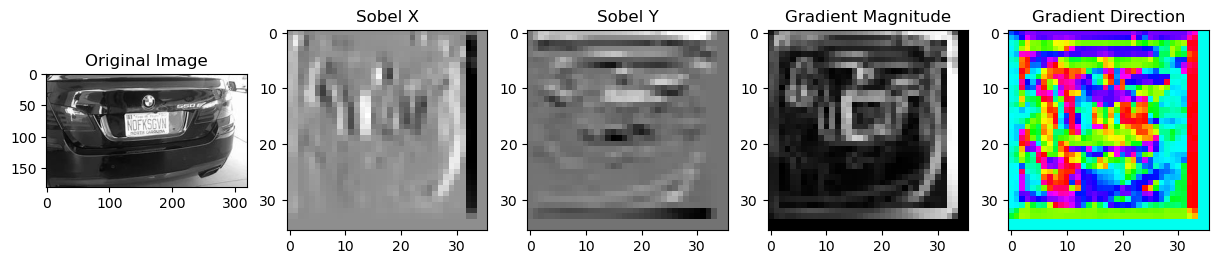

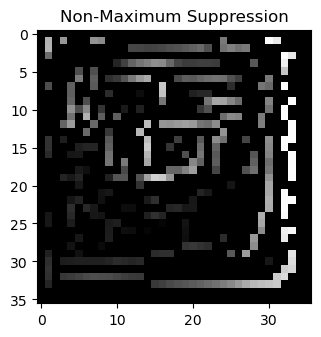

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#filter shape 5*5

a = 2
b = 2

gau_filter = np.zeros((5,5), np.float32)

for i in range(-1*a,a+1):
  for j in range(-1*b,b+1):
    normal = 1/(2* np.pi * 2**2)
    exp_term = np.exp(-(i**2.0 + j**2.0) / (2.0 * 2**2.0))
    gau_filter[i+a,j+b] = normal * exp_term


img = cv2.imread(r'C:\Users\canki\OneDrive - Indian Institute of Technology Patna\Desktop\Computer Vision Lab\image1.jpeg', cv2.IMREAD_GRAYSCALE)


blurred_img = cv2.filter2D(img, -1, gau_filter)


imagepath = r"C:\Users\canki\OneDrive - Indian Institute of Technology Patna\Desktop\Computer Vision Lab\image1.jpeg"
image = cv2.imread(imagepath,cv2.IMREAD_GRAYSCALE)
resizedimage= cv2.resize(image,(32,32))

padded_img = np.pad(resizedimage, ((2,2), (2, 2)), mode='constant', constant_values=0)


sobel_x_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobel_x = np.zeros_like(padded_img, dtype=np.float64)
sobel_y = np.zeros_like(padded_img, dtype=np.float64)

for i in range(1,padded_img.shape[0] - 1):
  for j in range(1,padded_img.shape[1] - 1):
    region = padded_img[i-1:i+1+1, j-1:j+1+1]
    sobel_x[i-1,j-1] = np.sum(region * sobel_x_filter)
    sobel_y[i-1, j-1] = np.sum(region * sobel_y_filter)


gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)


plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 5, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(1, 5, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(1, 5, 5)
plt.imshow(gradient_direction, cmap='hsv')
plt.title('Gradient Direction')

plt.show()

def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    result = np.zeros_like(magnitude, dtype=np.float64)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = direction[i, j]
            mag = magnitude[i, j]


            if 0 <= angle < np.pi/4 or 7*np.pi/4 <= angle <= 2*np.pi:
                neighbor1 = magnitude[i, j+1]
                neighbor2 = magnitude[i, j-1]
            elif np.pi/4 <= angle < 3*np.pi/4:
                neighbor1 = magnitude[i-1, j+1]
                neighbor2 = magnitude[i+1, j-1]
            elif 3*np.pi/4 <= angle < 5*np.pi/4:
                neighbor1 = magnitude[i-1, j]
                neighbor2 = magnitude[i+1, j]
            else:
                neighbor1 = magnitude[i-1, j-1]
                neighbor2 = magnitude[i+1, j+1]


            if mag >= neighbor1 and mag >= neighbor2:
                result[i, j] = mag
            else:
                result[i, j] = 0

    return result


suppressed_image = non_maximum_suppression(gradient_magnitude, gradient_direction)


plt.figure(figsize=(12, 4))



plt.subplot(1, 3, 3)
plt.imshow(suppressed_image, cmap='gray')
plt.title('Non-Maximum Suppression')

plt.show()


Using open cv


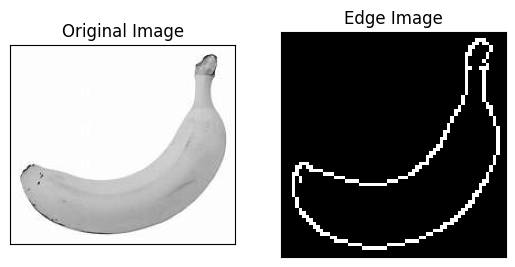

In [44]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/banana.jpeg', cv.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (64, 64))
edges = cv.Canny(img_resized,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()